# Importing data From Relational Databases

In [1]:
# import basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Using SQLAlchemy  Library 

In [2]:
import sqlalchemy

## Create Engine 
Using create_engine() funciton from sqlalchemy to Connect Database from file directory or URL

In [3]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///data/data.db')

engine.table_names()

['boro_census', 'hpd311calls', 'weather']

## Load table
Load table from engine to pandas DataFrame with or without query

In [4]:
# without query
hpd_calls_df = pd.read_sql('hpd311calls', engine)

# with query
weather_df = pd.read_sql('SELECT * FROM weather;', engine)

In [5]:
# show head of hpd_calls_df 
hpd_calls_df.head()

,unique_key,created_date,agency,complaint_type,incident_zip,incident_address,community_board,borough
0,38070822,01/01/2018,HPD,HEAT/HOT WATER,10468,2786 JEROME AVENUE,07 BRONX,BRONX
1,38065299,01/01/2018,HPD,PLUMBING,10003,323 EAST 12 STREET,03 MANHATTAN,MANHATTAN
2,38066653,01/01/2018,HPD,HEAT/HOT WATER,10452,1235 GRAND CONCOURSE,04 BRONX,BRONX
3,38070264,01/01/2018,HPD,HEAT/HOT WATER,10032,656 WEST 171 STREET,12 MANHATTAN,MANHATTAN
4,38072466,01/01/2018,HPD,HEAT/HOT WATER,11213,1030 PARK PLACE,08 BROOKLYN,BROOKLYN


In [6]:
# show head weather_df
weather_df.head()

,station,name,latitude,longitude,elevation,date,month,awnd,prcp,snow,tavg,tmax,tmin
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/01/2017,December,5.37,0.00,0.0,,52,42
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/02/2017,December,3.13,0.00,0.0,,48,39
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/03/2017,December,2.01,0.00,0.0,,48,42
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/04/2017,December,3.58,0.00,0.0,,51,40
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/05/2017,December,6.71,0.75,0.0,,61,50


## More query

In [7]:
# see maximum and minimum temperature
temperatures = pd.read_sql('SELECT date, tmax, tmin FROM weather;', engine)

temperatures

,date,tmax,tmin
0,12/01/2017,52,42
1,12/02/2017,48,39
2,12/03/2017,48,42
3,12/04/2017,51,40
4,12/05/2017,61,50
...,...,...,...
116,03/27/2018,47,34
117,03/28/2018,52,38
118,03/29/2018,53,49
119,03/30/2018,62,44


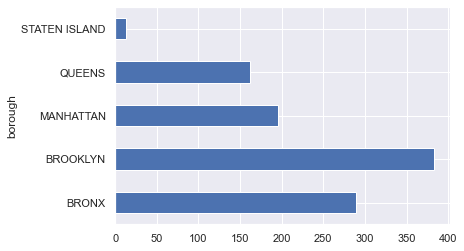

In [18]:
# see number of safety complaint by borough/district
safety_complaint = pd.read_sql(
    'SELECT * FROM hpd311calls\
        WHERE complaint_type == "SAFETY";', engine
)


# plotting
sns.set()
call_counts = safety_complaint.groupby('borough').unique_key.count()
call_counts.plot.barh()

In [25]:
# see calls count by complaint_type
calls_by_issue = pd.read_sql(
    'SELECT complaint_type, COUNT(*)\
        FROM hpd311calls GROUP BY complaint_type ORDER BY COUNT(*) DESC;', engine
)

calls_by_issue

,complaint_type,COUNT(*)
0,HEAT/HOT WATER,56740
1,PLUMBING,7117
2,UNSANITARY CONDITION,6820
3,PAINT/PLASTER,5680
4,DOOR/WINDOW,4451
5,WATER LEAK,3567
6,ELECTRIC,2777
7,GENERAL,2615
8,FLOORING/STAIRS,2190
9,APPLIANCE,1307


In [27]:
# see maximum and minimum temperature by month
weather_by_month = pd.read_sql(
    'SELECT month, MAX(tmax), MIN(tmin), SUM(prcp)\
        FROM weather GROUP BY month;', engine
)

weather_by_month

,month,MAX(tmax),MIN(tmin),SUM(prcp)
0,December,61,9,2.21
1,February,78,16,5.83
2,January,61,5,2.18
3,March,62,27,5.17


In [28]:
# join table
calls_and_weather = pd.read_sql(
    'SELECT * FROM hpd311calls JOIN weather\
        ON hpd311calls.created_date = weather.date;', engine
)

calls_and_weather

,unique_key,created_date,agency,complaint_type,incident_zip,incident_address,community_board,borough,station,name,...,longitude,elevation,date,month,awnd,prcp,snow,tavg,tmax,tmin
0,38070822,01/01/2018,HPD,HEAT/HOT WATER,10468,2786 JEROME AVENUE,07 BRONX,BRONX,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
1,38065299,01/01/2018,HPD,PLUMBING,10003,323 EAST 12 STREET,03 MANHATTAN,MANHATTAN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
2,38066653,01/01/2018,HPD,HEAT/HOT WATER,10452,1235 GRAND CONCOURSE,04 BRONX,BRONX,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
3,38070264,01/01/2018,HPD,HEAT/HOT WATER,10032,656 WEST 171 STREET,12 MANHATTAN,MANHATTAN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
4,38072466,01/01/2018,HPD,HEAT/HOT WATER,11213,1030 PARK PLACE,08 BROOKLYN,BROOKLYN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91994,38353080,01/31/2018,HPD,HEAT/HOT WATER,10457,1511 SHERIDAN AVENUE,04 BRONX,BRONX,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/31/2018,January,6.71,0.0,0.0,,33,18
91995,38354647,01/31/2018,HPD,HEAT/HOT WATER,10457,1860 GRAND CONCOURSE,05 BRONX,BRONX,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/31/2018,January,6.71,0.0,0.0,,33,18
91996,38352537,01/31/2018,HPD,HEAT/HOT WATER,10462,2090 EAST TREMONT AVENUE,09 BRONX,BRONX,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/31/2018,January,6.71,0.0,0.0,,33,18
91997,38349554,01/31/2018,HPD,HEAT/HOT WATER,11213,187 ROCHESTER AVENUE,08 BROOKLYN,BROOKLYN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/31/2018,January,6.71,0.0,0.0,,33,18
